#### Imports

In [14]:
import os
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

#### Getting opinions about product from the database

In [15]:
print(*[filename.split(".")[0] for filename in os.listdir("./opinions")], sep="\n")

39562616


In [23]:
product_id = input("Please input product code: ")

In [24]:
opinions =pd.read_json(f"./opinions/{product_id}.json")
opinions 

,opinion_id,author,recommend,stars,content_pl,pros_pl,cons_pl,up_votes,down_votes,published,content_en,pros_en,cons_en
0,3422858,Użytkownik Ceneo,1.0,5.0,"UWAGA, UWAGA do wszystkich zgłaszających probl...",[],[],57,7,None,"Note, note to all reporting the problem with t...",[],[]
1,3529254,Marcin,1.0,4.5,"Ogólnie spoko, chociaż telefon po wyjęciu z pu...",[przycisk home - trzeba mocno naciskać],[przycisk home - trzeba mocno naciskać],3,0,2015-12-27 14:12:05,"Generally cool, although the phone after remov...",[Home button - you have to press hard],[Home button - you have to press hard]
2,6706897,zedi,1.0,4.0,Wady Słaby dźwięk z głośnika głównego - z tyłu...,"[bateria lądująca w godzine 100%, czas pracy n...","[bateria lądująca w godzine 100%, czas pracy n...",0,2,None,Disadvantages poor sound from the main speaker...,"[battery landing 100%, battery life, poor soun...","[battery landing 100%, battery life, poor soun..."
3,3580458,Janek,1.0,5.0,Smartphone szybki i stabilny. Super ekran doty...,[],[],37,16,2016-01-25 12:30:40,Smartphone fast and stable. Super touch screen...,[],[]
4,3287614,maciej,1.0,4.0,"Generalnie bardzo dobry smartfon, moim zdaniem...",[],[],35,14,None,"Generally, a very good smartphone, in my opini...",[],[]
...,...,...,...,...,...,...,...,...,...,...,...,...,...
127,3502307,Użytkownik Ceneo,1.0,5.0,"5,0/5",[],[],0,0,None,5.0/5,[],[]
128,3455136,Użytkownik Ceneo,1.0,5.0,"5,0/5",[],[],0,0,None,5.0/5,[],[]
129,3442558,Użytkownik Ceneo,1.0,5.0,"5,0/5",[],[],0,0,None,5.0/5,[],[]
130,3430751,Użytkownik Ceneo,1.0,5.0,"5,0/5",[],[],0,0,None,5.0/5,[],[]


#### Calculating of basic statistic

In [25]:
opinions_count = opinions.shape[0]
pros_count = opinions.pros_pl.astype(bool).sum() #the dictionary way like square brackets 
cons_count = opinions.cons_pl.astype(bool).sum()
pros_cons_count = opinions.apply(lambda o: bool (o.pros_pl) and bool (o.cons_pl), axis=1).sum() #o is like a row, axis is a column 
average_stars = opinions.stars.mean()
print(f"Number of opinions about the product: {opinions_count}")
print(f"Number of opinions about the product in which advantages has been listed: {pros_count}")
print(f"Number of opinions about the product in which disadvantages has been listed: {cons_count}")
print(f"Number of opinions about the product in which adantages and disadvantages has been listed: {pros_cons_count}")
print(f"Average score of the product: {average_stars: .2f}")



Number of opinions about the product: 132
Number of opinions about the product in which advantages has been listed: 14
Number of opinions about the product in which disadvantages has been listed: 14
Number of opinions about the product in which adantages and disadvantages has been listed: 14
Average score of the product:  4.47


In [26]:
pros = opinions.pros_en.explode().value_counts()
cons = opinions.cons_en.explode().value_counts()
print(pros)
print(cons)

pros_en
battery landing 100%                                       3
battery life                                               3
poor sound quality from the speaker                        3
resistance                                                 3
functionality                                              3
can sneak                                                  3
Home button - you have to press hard                       2
The battery holds for two days at a fairly intersection    2
Software disadvantages                                     2
it can't cope with many applications                       1
After half a year of use, it hangs                         1
He turned off himself more than once                       1
jam                                                        1
no MHL                                                     1
TEVERING TAKE                                              1
Name: count, dtype: int64
cons_en
battery landing 100%                       

### Drawing charts 

In [81]:
if not os.path.exists("./pie_charts"):
    os.mkdir("./pie_charts")
if not os.path.exists("./bar_charts"):
    os.mkdir("./bar_charts")

In [82]:
recomendations = opinions.recommend.value_counts(dropna=False).reindex([True, False, np.nan],fill_value=0)
recomendations 

recommend
True     114
False      7
NaN       11
Name: count, dtype: int64

FileNotFoundError: [Errno 2] No such file or directory: './opions/39562616.png'

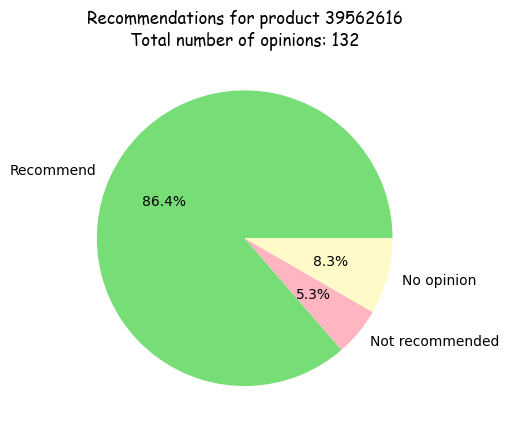

In [83]:
recomendations.plot.pie(
    label = "",
    labels = [ "Recommend", "Not recommended", "No opinion"], 
    colors = ['#77dd77', '#ffb6c1', '#fffac8'],
    #['forestgreen', 'crimson', 'steelblue'],
    autopct = lambda r: f"{r:.1f}%" if r>0 else ''
)
plt.title(f"Recommendations for product {product_id}\nTotal number of opinions: {opinions_count}",fontname='Comic Sans MS')
plt.savefig(f"./opions/{product_id}.png")
plt.close()

In [64]:
stars = opinions.stars.value_counts().reindex(list(np.arange(0.5,5.5,0.5)), fill_value=0)
stars

stars
0.5     3
1.0     1
1.5     2
2.0     1
2.5     0
3.0     5
3.5     3
4.0    19
4.5    19
5.0    79
Name: count, dtype: int64

FileNotFoundError: [Errno 2] No such file or directory: './opions/39562616.png'

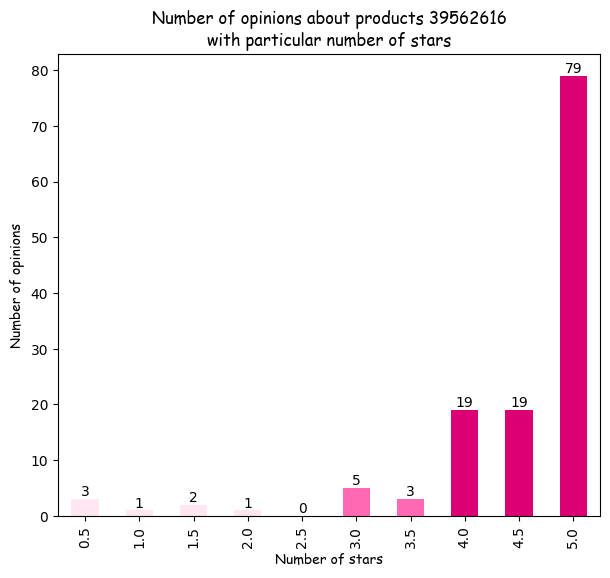

In [80]:
plt.figure(figsize= (7,6))
ax = stars.plot.bar(
    color = ["#db0073" if s>3.5 else "#ffe6f0" if s<3 else "#ff69b4" for s in stars.index]
)
plt.bar_label(container=ax.containers[0])
plt.xlabel("Number of stars", fontname='Comic Sans MS')
plt.ylabel("Number of opinions", fontname='Comic Sans MS')
plt.title(f"Number of opinions about products {product_id}\nwith particular number of stars", fontname='Comic Sans MS'), 
plt.xticks(rotation=90)
plt.savefig(f"./opions/{product_id}.png")
plt.close()